In [59]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [60]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [61]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [62]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

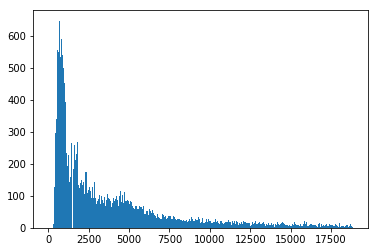

In [63]:
# univariate plot of diamond prices
# for the numerical variable price, I would choose histogram 
bin_edges = np.arange(0 , diamonds['price'].max()+20 , 20)
plt.hist(data = diamonds , x = 'price', bins = bin_edges);

> Throughout this case study, you'll see comments in Markdown cells like the one below, where the text has been colored in white. Unlike the exercises in earlier lessons, a reference plot will not be provided: you'll need to assess on your own whether or not your plot matches the comments. To view these comments, you can either highlight the text, or double click the Markdown cell. Remove or change the 'color=white' style on the text to un-spoiler the commentary.

Price distribution comment 1: The initial plots should show that diamond price follows a highly right skewed distribution. Now I want to try a log scaling

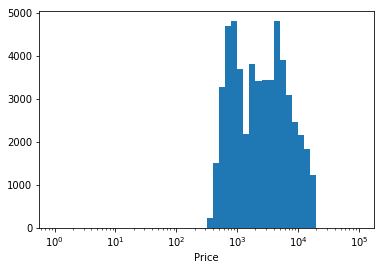

In [64]:
bin_edges = 10**np.arange(0, 5+0.1 , 0.1)  
# 0 means 10^0 is the start point, 5 means 10^5 is the ending point , 10^0.1 is the gap
# do i need to increase the max tick
ticks = [0.1 , 0.3 , 1 , 3 , 10 , 30 , 100 , 300 , 1000 , 3000 , 10000, 30000 , 100000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = diamonds , x = 'price', bins = bin_edges);
plt.xticks(ticks,labels)
plt.xlabel('Price')
plt.xscale('log');


Price distribution comment 2: Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

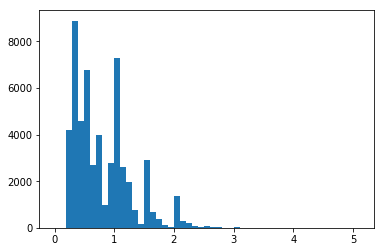

In [65]:
# univariate plot of carat weights
# numeric variable so I still choose histgram 
bin_edges = np.arange(0 , diamonds['carat'].max()+0.1 , 0.1)
plt.hist(data = diamonds , x = 'carat', bins = bin_edges);

Carat distribution comment: You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?</span>

(0, 3)

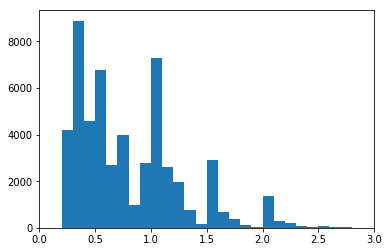

In [66]:
# let's try to zoom in 
bin_edges = np.arange(0 , diamonds['carat'].max()+0.1 , 0.1)
plt.hist(data = diamonds , x = 'carat', bins = bin_edges);
plt.xlim(0,3)


Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

* univariate plots of cut, color, and clarity grades
* cut, color, and clarity are all categorical variables so I would choose a bar chart
* since they're ordinal in nature, the bars should be sorted in order of increasing quality level. 

In [67]:
# make them orderd 
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])
        


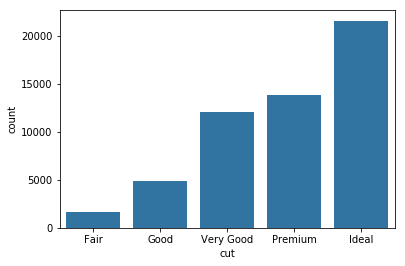

In [69]:
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds , x = 'cut', color = base_color )

Cut distribution comment: The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

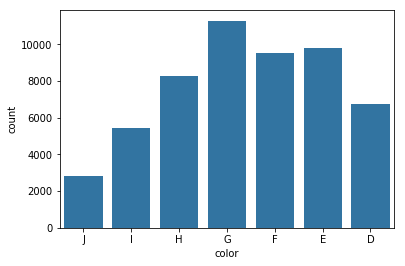

In [70]:
#diamonds['color'].value_counts()
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds , x = 'color', color = base_color)

Color distribution comment: The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)

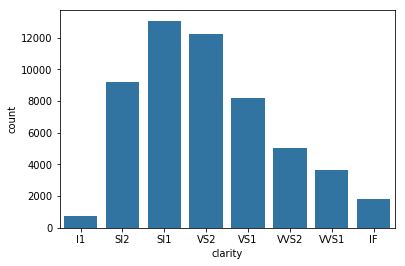

In [72]:
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds , x = 'clarity', color = base_color)

Clarity distribution comment:There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).